## Exercise 6

The purpose of this exercise is to help you learn how to use some of the predictive modeling methods
available in Python as well as association rule mining (not available in python). Follow the instructions
below to complete the exercise. Save your IPython notebook as exercise6.ipynb.


1. Download the data sets train.csv and test.csv from the class Web page. The data contains information about the date, temperature, humidity, and other environmental factors for the office. The goal is to predict whether the office room is occupied (1) or not (0). Implement the following steps in an ipython notebook:

    a. Use pandas to load the train.csv file into a DataFrame object named “data”. After the file is
    successfully loaded, type data.head() to display the first 5 rows of the table. Remove the
    “date” column from the table using the drop() function since the column is not predictive of
    the class (unless you extract the time of day and day of week information). Use the last
    column, Occupancy, as your target (class) variable.
    
    b. Train the following classifiers (using 5-fold cross validation) on the train.csv file and calculate
    the average accuracy of the cross-validation for each method given below. Vary the
    hyperparameters of the classifier and draw a plot that shows the average cross-validation
    accuracy versus hyperparameter values for each classification method shown below:
    
    c. For each method above, train a model using the entire train.csv dataset (with the hyperparameter you had chosen from the previous step). Apply the model to the test.csv data. Draw a bar chart to compare their test accuracies using the 3 methods.
    
    

    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

test = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')
titanic = pd.read_csv('Titanic.csv')

In [2]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 18:07,23.000,27.200,0.0,681.5,0.004728,0
1,2/4/2015 18:16,22.790,27.445,0.0,689.0,0.004710,0
2,2/4/2015 19:05,22.245,27.290,0.0,602.5,0.004530,0
3,2/4/2015 19:06,22.200,27.290,0.0,598.0,0.004517,0
4,2/4/2015 19:12,22.200,27.290,0.0,593.5,0.004517,0


In [3]:
X = data.drop(['date', 'Occupancy'], axis = 1)
Y = data['Occupancy']

In [4]:
# Decision Tree
from sklearn import tree

hyperparams = [1, 5, 10, 50, 100] #maxdepth 
accuracy = []
for param in hyperparams:
    clf = tree.DecisionTreeClassifier(max_depth = param) 
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())
    


([<matplotlib.axis.YTick at 0x7f1602d28f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

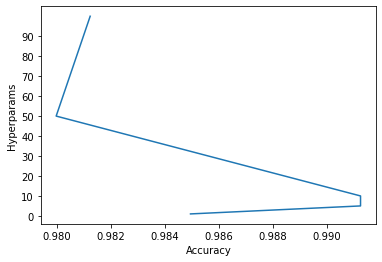

In [5]:
plt.plot(accuracy, hyperparams)
plt.xlabel("Accuracy")
plt.ylabel("Hyperparams")
plt.yticks(np.arange(0, 100, step=10))

The Hyperparam 5 gives the best accuracy

In [6]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

hyperparams = [1, 2, 3, 4, 5, 10,15] #k
accuracy = []
for param in hyperparams:
    neigh = KNeighborsClassifier(n_neighbors=param)
    scores = cross_val_score(neigh, X, Y, cv=5)
    accuracy.append(scores.mean())


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

([<matplotlib.axis.YTick at 0x7f1600c28910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

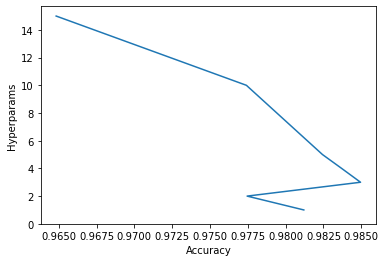

In [7]:
plt.plot(accuracy, hyperparams)
plt.xlabel("Accuracy")
plt.ylabel("Hyperparams")
plt.yticks(np.arange(0, 15, step=2))

The Hyperparam 3 gives the best accuracy

In [8]:
#Logictic Regression
from sklearn.linear_model import LogisticRegression

hyperparams = [0.001, 0.01, 0.1, 0.5, 1]
accuracy = []
for param in hyperparams:
    clf = LogisticRegression(C = param)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())
    


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

([<matplotlib.axis.YTick at 0x7f1600c112e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

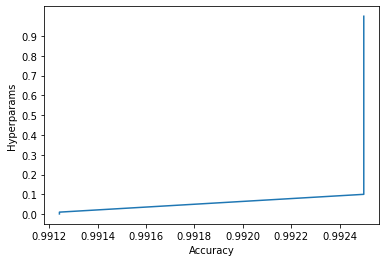

In [9]:
plt.plot(accuracy, hyperparams)
plt.xlabel("Accuracy")
plt.ylabel("Hyperparams")
plt.yticks(np.arange(0, 1, step=0.1))

The Hyperparam 0.5 gives the best accuracy

### TESTING ALL BEST PARAMS

In [10]:
X_test = test.drop(['date', 'Occupancy'], axis = 1)
Y_test = test['Occupancy']

In [19]:
clf = tree.DecisionTreeClassifier(max_depth = 5) 
clf.fit(X,Y)
y_pred = clf.predict(X_test)
treeacc = accuracy_score(Y_test,y_pred)
treeacc

0.9846174789000817

In [18]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y)
y_pred = neigh.predict(X_test)
neighacc = accuracy_score(Y_test,y_pred)
neighacc

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.988429077048734

In [17]:
clf = LogisticRegression(C = 0.5)
clf.fit(X,Y)
y_pred = clf.predict(X_test)
logacc = accuracy_score(Y_test,y_pred)
logacc

0.9876123060168799

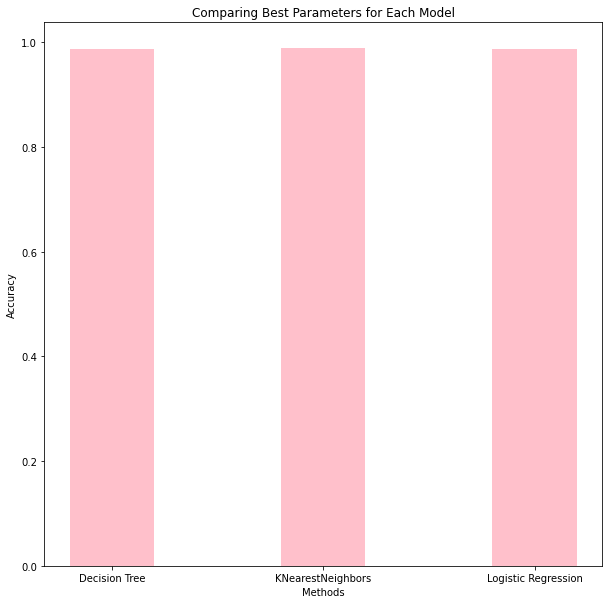

In [16]:
fig = plt.figure(figsize = (10, 10))
methods = ['Decision Tree', 'KNearestNeighbors', 'Logistic Regression']
values = [treeacc, neighacc, logacc]

# creating the bar plot
plt.bar(methods, values, color ='pink', width = 0.4)
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Comparing Best Parameters for Each Model")
plt.show()

### Part 2
Download the apriori software from the following website http://www.borgelt.net/apriori.html.
Download the data set Titanic.csv from the class Web page. Generate the association rules from
the data with the following thresholds: minimum support =1% and minimum conference = 90%. 

In [9]:
titanic

,FirstClass,Adult,Male,Survived
0,FirstClass,Adult,Male,Survived
1,FirstClass,Adult,Male,Survived
2,FirstClass,Adult,Male,Survived
3,FirstClass,Adult,Male,Survived
4,FirstClass,Adult,Male,Survived
...,...,...,...,...
2195,Crew,Adult,Female,Survived
2196,Crew,Adult,Female,Survived
2197,Crew,Adult,Female,Survived
2198,Crew,Adult,Female,Died


In [2]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=8dbf8f40a4d6fdde0b838e95afd3f6d1b2b8f8875fbc89a2b4b7419232de8d44
  Stored in directory: c:\users\alexi\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [3]:
from apyori import apriori

In [10]:
records = []
for i in range(0, 2200):
    records.append([str(titanic.values[i,j]) for j in range(0, 4)])

In [11]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.29)
association_results = list(association_rules)

In [12]:
association_results

[RelationRecord(items=frozenset({'Adult'}), support=0.9504545454545454, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Adult'}), confidence=0.9504545454545454, lift=1.0)]),
 RelationRecord(items=frozenset({'Crew'}), support=0.4022727272727273, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Crew'}), confidence=0.4022727272727273, lift=1.0)]),
 RelationRecord(items=frozenset({'Died'}), support=0.6772727272727272, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Died'}), confidence=0.6772727272727272, lift=1.0)]),
 RelationRecord(items=frozenset({'Male'}), support=0.7863636363636364, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Male'}), confidence=0.7863636363636364, lift=1.0)]),
 RelationRecord(items=frozenset({'Survived'}), support=0.32272727272727275, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Survived'})

In [14]:
file = open('titanic.rules', 'w')
for i in association_results:
    file.write(str(i))
file.close()